In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from datetime import datetime, date 
import matplotlib.dates as mdates
import pickle

In [2]:
#Import du dataset 
df = pd.read_csv("../../data/archive/RAW_recipes.csv")

print(df.columns)
df['submitted'] = pd.to_datetime(df['submitted'], errors='coerce')

print(df.dtypes)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
name                      object
id                         int64
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
n_steps                    int64
steps                     object
description               object
ingredients               object
n_ingredients              int64
dtype: object


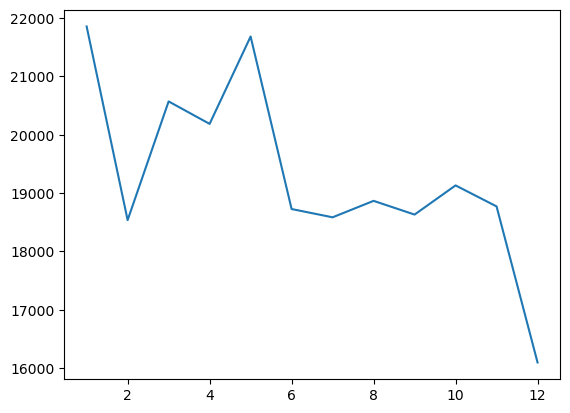

In [3]:
# Les dates sont déjà au format datetime64
#La c'est trié par mois de publication
decembre = df[df['submitted'].dt.month == 12]
novembre = df[df['submitted'].dt.month == 11]
octobre = df[df['submitted'].dt.month == 10]
septembre = df[df['submitted'].dt.month == 9]
aout = df[df['submitted'].dt.month == 8]
juillet = df[df['submitted'].dt.month == 7]
juin = df[df['submitted'].dt.month == 6]
mai = df[df['submitted'].dt.month == 5]
avril = df[df['submitted'].dt.month == 4]
mars = df[df['submitted'].dt.month == 3]
fevrier = df[df['submitted'].dt.month == 2]
janvier = df[df['submitted'].dt.month == 1]

nb_recettes_par_mois = [len(df[df['submitted'].dt.month == i]) for i in range(1,13) ]

x = np.linspace(1,12,12)

plt.plot(x,nb_recettes_par_mois)

plt.show()


In [4]:
#Bon on s'en fiche de ce qu'il y a au dessus
#On va créer un dictionnaire, clé jour-mois, valeur = nb recettes postées à cette date 
#On commence par un dictionnaire avec toutes les dates, valeurs à 0 

recettes_par_date = {}
# Boucle sur les mois (de 1 à 12)
for month in range(1, 13):
    # Boucle sur les jours de chaque mois
    for day in range(1, 32):  # On va traiter les mois avec 28, 30 et 31 jours après
        try:

            date(2016, month, day) #J'ai pas complètement compris comment ça marche date
            # Si le jour existe, on l'ajoute au dictionnaire avec la valeur 0
            recettes_par_date[(day, month)] = 0
        except ValueError:
            # Si la date n'existe pas (par exemple, le 30 février), on passe à l'itération suivante
            continue

print(recettes_par_date)
#Des tuples pour les dates car elles ne changent pas, bon j'ai quelques doutes .. 

{(1, 1): 0, (2, 1): 0, (3, 1): 0, (4, 1): 0, (5, 1): 0, (6, 1): 0, (7, 1): 0, (8, 1): 0, (9, 1): 0, (10, 1): 0, (11, 1): 0, (12, 1): 0, (13, 1): 0, (14, 1): 0, (15, 1): 0, (16, 1): 0, (17, 1): 0, (18, 1): 0, (19, 1): 0, (20, 1): 0, (21, 1): 0, (22, 1): 0, (23, 1): 0, (24, 1): 0, (25, 1): 0, (26, 1): 0, (27, 1): 0, (28, 1): 0, (29, 1): 0, (30, 1): 0, (31, 1): 0, (1, 2): 0, (2, 2): 0, (3, 2): 0, (4, 2): 0, (5, 2): 0, (6, 2): 0, (7, 2): 0, (8, 2): 0, (9, 2): 0, (10, 2): 0, (11, 2): 0, (12, 2): 0, (13, 2): 0, (14, 2): 0, (15, 2): 0, (16, 2): 0, (17, 2): 0, (18, 2): 0, (19, 2): 0, (20, 2): 0, (21, 2): 0, (22, 2): 0, (23, 2): 0, (24, 2): 0, (25, 2): 0, (26, 2): 0, (27, 2): 0, (28, 2): 0, (29, 2): 0, (1, 3): 0, (2, 3): 0, (3, 3): 0, (4, 3): 0, (5, 3): 0, (6, 3): 0, (7, 3): 0, (8, 3): 0, (9, 3): 0, (10, 3): 0, (11, 3): 0, (12, 3): 0, (13, 3): 0, (14, 3): 0, (15, 3): 0, (16, 3): 0, (17, 3): 0, (18, 3): 0, (19, 3): 0, (20, 3): 0, (21, 3): 0, (22, 3): 0, (23, 3): 0, (24, 3): 0, (25, 3): 0, (26, 3

**On a un dictionnaire avec toutes les dates, les valeurs sont toutes à 0**

Technique pour accéder à une valeur dans un dataframe : 
df[df['id'] == 49]['submitted'] prends le submitted associé à l'id 49 

In [5]:
for i in df['id'] :
    jour_mois_année = df[df['id']==i]['submitted'].iloc[0] # on sort la date de l'id 
    recettes_par_date[jour_mois_année.day,jour_mois_année.month] +=1
   # recettes_par_date[(jour_mois_année.day,jour_mois_année.month)] += 1 #On rajoute 1 à la date associée 


print(recettes_par_date)

#Normalement là j'ai le dictionnaire c'est bon 
#Boucles for assez couteuses en python 

{(1, 1): 452, (2, 1): 648, (3, 1): 878, (4, 1): 434, (5, 1): 594, (6, 1): 744, (7, 1): 1020, (8, 1): 1161, (9, 1): 599, (10, 1): 538, (11, 1): 729, (12, 1): 683, (13, 1): 721, (14, 1): 665, (15, 1): 716, (16, 1): 728, (17, 1): 647, (18, 1): 861, (19, 1): 514, (20, 1): 526, (21, 1): 743, (22, 1): 990, (23, 1): 829, (24, 1): 547, (25, 1): 654, (26, 1): 565, (27, 1): 661, (28, 1): 757, (29, 1): 868, (30, 1): 736, (31, 1): 648, (1, 2): 591, (2, 2): 749, (3, 2): 771, (4, 2): 654, (5, 2): 668, (6, 2): 765, (7, 2): 602, (8, 2): 797, (9, 2): 609, (10, 2): 676, (11, 2): 732, (12, 2): 649, (13, 2): 706, (14, 2): 485, (15, 2): 471, (16, 2): 661, (17, 2): 478, (18, 2): 473, (19, 2): 625, (20, 2): 715, (21, 2): 609, (22, 2): 811, (23, 2): 850, (24, 2): 552, (25, 2): 849, (26, 2): 518, (27, 2): 701, (28, 2): 565, (29, 2): 204, (1, 3): 720, (2, 3): 652, (3, 3): 579, (4, 3): 758, (5, 3): 597, (6, 3): 1090, (7, 3): 494, (8, 3): 640, (9, 3): 709, (10, 3): 618, (11, 3): 738, (12, 3): 551, (13, 3): 996, (

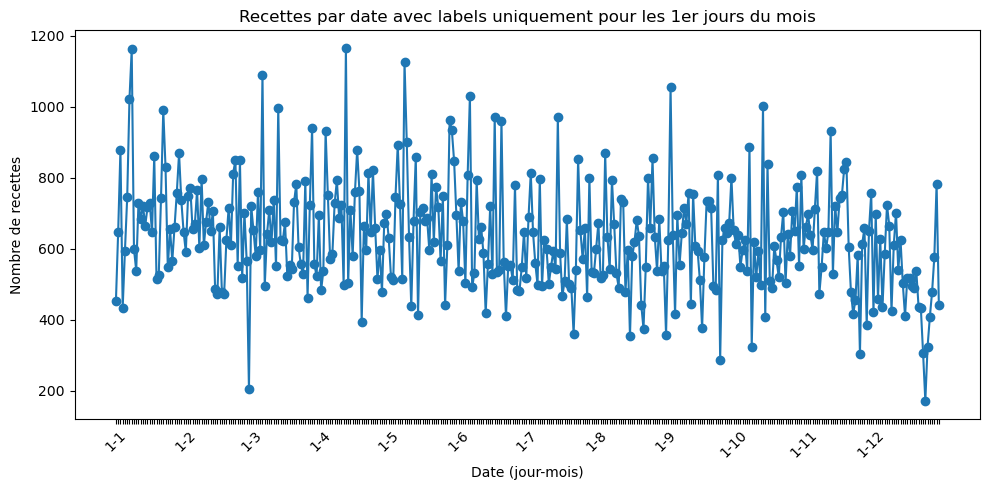

In [6]:
dates = [f"{jour}-{mois}" for jour, mois in recettes_par_date.keys()]
valeurs = list(recettes_par_date.values())

# Tracer le graphique pour tous les jours
plt.figure(figsize=(10, 5))
plt.plot(dates, valeurs, marker='o')

# Obtenir les labels uniquement pour les premiers jours des mois
labels_1er_jour_mois = [f"{jour}-{mois}" if jour == 1 else "" for jour, mois in recettes_par_date.keys()]

# Ajouter les labels uniquement pour les 1er jours du mois
plt.xticks(ticks=range(len(dates)), labels=labels_1er_jour_mois, rotation=45)

# Ajouter des labels et un titre
plt.xlabel('Date (jour-mois)')
plt.ylabel('Nombre de recettes')
plt.title('Recettes par date avec labels uniquement pour les 1er jours du mois')

# Ajuster l'espacement pour éviter que les labels ne se chevauchent
plt.tight_layout()

# Afficher le graphique
plt.show()

**recettes_par_date est un dictionnaire**

**clé = date, valeur = nombre de recettes postées ce jour-là**

In [7]:
top = sorted(recettes_par_date.items(),key =lambda x : x[1], reverse = True) #Liste des dates tops sorted

top_10 = top[:36]
dates_plus_postées = [date for date, value in top_10]

print(dates_plus_postées)

valeurs = list(recettes_par_date.values())

#mediane = 624.5
#60% : 657.0
#90% : valeurs normales
#On prend que les 36 valeurs les plus élevées du coup 

[(12, 4), (8, 1), (8, 5), (6, 3), (3, 9), (6, 6), (7, 1), (14, 10), (13, 3), (22, 1), (17, 6), (15, 7), (28, 5), (20, 6), (28, 3), (29, 5), (13, 11), (3, 4), (9, 5), (5, 5), (8, 10), (3, 1), (17, 4), (29, 1), (5, 8), (18, 1), (13, 5), (26, 8), (24, 7), (23, 2), (25, 2), (30, 5), (20, 11), (16, 10), (23, 1), (19, 11)]


In [8]:
#Mettre la liste dates_plus_postées dans un fichier pour pouvoir le récupérer dans Webapp
with open('webapp_assets/dates_plus_postees.pkl', 'wb') as fichier:
    pickle.dump(dates_plus_postées, fichier)

**On a dans dates les 10% dates avec le plus de posts de recettes**

In [9]:

recettes_par_saison = {'Hiver' : 0,'Automne': 0, 'Printemps': 0, 'Ete': 0}

for i in recettes_par_date.keys() :
    if 3 > i[1] :
        recettes_par_saison['Hiver'] += recettes_par_date[i]
    if 3 == i[1] :
        if 19 >= i [0] :
             recettes_par_saison['Hiver'] += recettes_par_date[i]
        else : 
            recettes_par_saison['Printemps'] += recettes_par_date[i]
    if 3 < i[1] < 6 :
        recettes_par_saison['Printemps'] += recettes_par_date[i]
    if i[1] == 6 :
        if 20 >= i[0] :
            recettes_par_saison['Printemps'] += recettes_par_date[i]
        else : 
            recettes_par_saison['Ete'] += recettes_par_date[i]
    if 6 < i[1] < 9 :
        recettes_par_saison['Ete'] += recettes_par_date[i]
    if i[1] == 9 :
        if 22 >= i[0] :
            recettes_par_saison['Ete'] += recettes_par_date[i]
        else : 
            recettes_par_saison['Automne'] += recettes_par_date[i]
    if 9 < i[1] < 12 : 
        recettes_par_saison['Automne'] += recettes_par_date[i]
    if i[1] == 12 :
        if 20 >= i[0] :
             recettes_par_saison['Automne'] += recettes_par_date[i]
        else : 
            recettes_par_saison['Hiver'] += recettes_par_date[i]



In [10]:
print(recettes_par_saison)

{'Hiver': 57969, 'Automne': 54077, 'Printemps': 62958, 'Ete': 56633}


In [11]:
#Mettre le dico recettes_par_saison dans un fichier pour pouvoir le récupérer dans Webapp
with open('webapp_assets/recettes_par_saison.pkl', 'wb') as fichier:
    pickle.dump(recettes_par_saison, fichier)

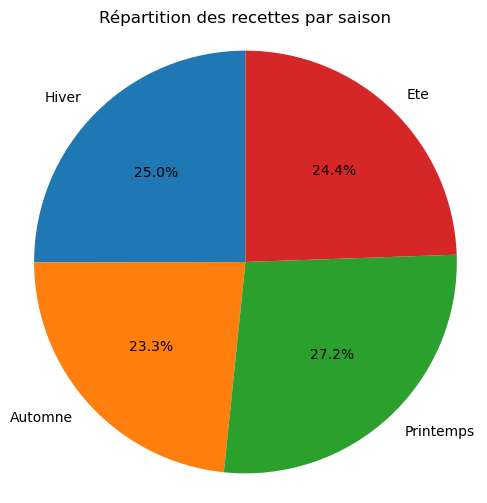

In [12]:
labels = list(recettes_par_saison.keys())
values = list(recettes_par_saison.values())

plt.figure(figsize=(6, 6))  # Définir la taille du graphique
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)  # Créer le camembert
plt.axis('equal')  # Assure que le camembert est bien rond
plt.title("Répartition des recettes par saison")
plt.show()

Hiver : du 21 décembre au 19 mars (mois 12, 1, 2 et une partie du mois de mars)
Printemps : du 20 mars au 20 juin (mois 3, 4, 5 et une partie de juin)
Été : du 21 juin au 22 septembre (mois 6, 7, 8 et une partie de septembre)
Automne : du 23 septembre au 20 décembre (mois 9, 10, 11 et une partie de décembre)

On remarque qu'il n'ya pas de différences significatives entre les saisons, bien qu'il y ait plus de recettes postées en printemps, et moins en automne. Cela suggère une certaine corrélation. 

On se concentre maintenant sur le top 10% :
Janvier (1) : 7 occurrences
Mai (5) : 7 occurrences
Avril (4) : 3 occurrences
Mars (3) : 3 occurrences
Juin (6) : 3 occurrences
Octobre (10) : 3 occurrences
Novembre (11) : 3 occurrences
Juillet (7) : 2 occurrences
Août (8) : 2 occurrences
Février (2) : 2 occurrences

De plus on remarque des liens avec des fêtes importantes aux Etats-Unis : 

19 et 20 novembre : proche de Thanksgiving (à confirmer avec les recettes)



 valeur for _, valeur in top_10 : Permet de parcourir mes valeurs dans ma liste, qui sont des tuples, en ignorant la première valeur de chaque tuple, pour sommer uniquement sur la deuxième

231637


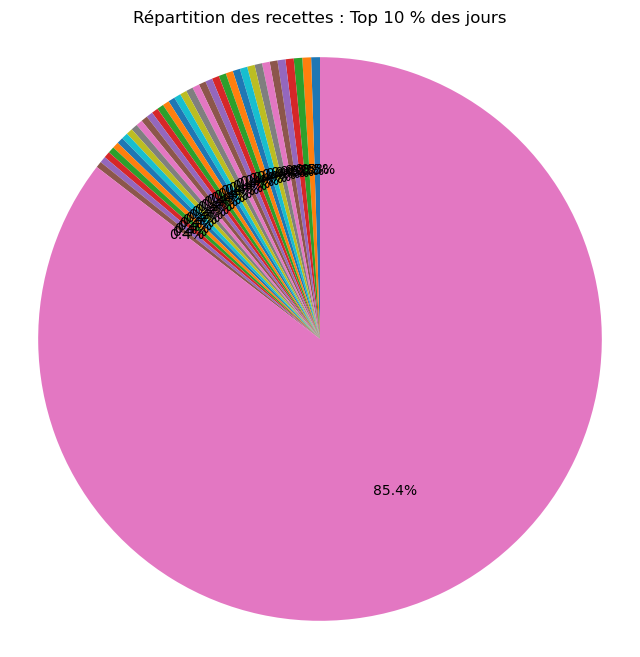

In [13]:
nb_recettes_total = sum(recettes_par_saison.values())
print(nb_recettes_total)

nb_recettes_dans_le_top_10 = sum([valeur for _, valeur in top_10])
nb_recettes_restantes = nb_recettes_total - nb_recettes_dans_le_top_10

labels = [date for date, _ in top_10] + ['Other']
values = [valeur for _, valeur in top_10] + [nb_recettes_restantes]

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(values,autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assure que le camembert soit bien rond
plt.title("Répartition des recettes : Top 10 % des jours")
plt.show()

counters à regarder, pandas fait tout de manière vectorisé 

Le top 10% occupe 15% de l'espace : pas particulièrement de dominance, ou de journée surexploitée.

## Pas beaucoup plus à en dire, je vais chercher des corrélations dates/aliments

Je commence par un nb aliments par saison. Je voudrais prendre tous les aliments en enlevant les extrêmes

**21/11 : finalement on va faire le camembert en fonction des temps de cuisson. On va prendre les intervalles : 0-5min, 5-10, 10-15 ... jusqu'à ? On va stocker les pourcentages et les top 10 recettes pour chaque saison dans une database très réduite qu'on va utiliser lors de l'affichage**

1. temps de recette max 

In [45]:
df = pd.read_csv("../../data/archive/RAW_recipes.csv")
#print(df[df['id']==137739].iloc[0]) #Comme ça qu'on prend une ligne selon l'id ! 
#print(df.columns)
times = df['minutes']

ids = df['id']
vector_id = ids.to_numpy()
#print(vector_id)


##print(times)
vector = times.to_numpy()
#print(vector)

#dictionnaire_minutes = {} #clé = id, valeur = temps de cuisson
dictionnaire_minutes =  {}

j=0
for i in vector_id :
    #dictionnaire_minutes[i] = df[df['id'] == i ]['minutes'].iloc[0]
    dictionnaire_minutes[i] = vector[j]
    j+=1

#print(dictionnaire_minutes)
#print(dictionnaire_minutes_methode2)

#print('les deux dictionnaires sont-ils identiquent ? :',dictionnaire_minutes == dictionnaire_minutes_methode2 ) #Vraie !! donc on prend la méthode 2 , qui est bien plus rapide (2s au lieu de 30s)


In [46]:
print(list(dictionnaire_minutes.values())[:100])


[55, 30, 130, 45, 190, 0, 15, 120, 180, 70, 5, 1460, 2970, 525, 5, 500, 45, 15, 70, 110, 45, 55, 35, 20, 25, 10, 40, 495, 40, 90, 70, 55, 13, 26, 10, 12, 50, 30, 30, 45, 18, 35, 45, 35, 25, 15, 45, 230, 50, 35, 14450, 90, 70, 35, 40, 25, 25, 30, 20160, 15, 25, 15, 10, 125, 120, 10, 20, 5, 135, 90, 120, 70, 40, 28, 60, 30, 25, 20, 120, 160, 135, 1470, 45, 45, 5, 90, 65, 70, 150, 10, 75, 35, 150, 15, 45, 70, 90, 2, 40, 32]


top 3 temps : (261647, 2147483647), (447963, 1051200), (291571, 288000)

In [50]:
top = sorted(dictionnaire_minutes.items(),key =lambda x : x[1], reverse = True) #Liste des mots les plus utilisés
#print(top)
print(df[df['id']==261647]['minutes'].iloc[0])

2147483647


Boite à moustache pour enlever les recettes qui ont des valeurs temps de cuisson absurdes 

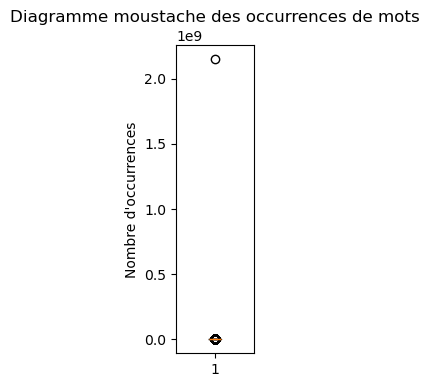

In [51]:
# Extraire les occurrences et les mots
occurrences_values = list(dictionnaire_minutes.values())
mots = list(dictionnaire_minutes.keys())

# Créer le diagramme en boîte (boxplot)
fig, ax = plt.subplots()
fig.set_size_inches(1, 4)
ax.boxplot(occurrences_values)

# Calculer la position des points extrêmes
outliers = ax.lines[5].get_ydata()

# Afficher les mots associés aux outliers (valeurs extrêmes)
for outlier in outliers:
    # Trouver le mot correspondant à la valeur d'occurrence
    mot_associe = [mot for mot, count in dictionnaire_minutes.items() if count == outlier]

# Ajouter un titre et des labels
plt.title('Diagramme moustache des occurrences de mots')
plt.ylabel('Nombre d\'occurrences')

# Afficher le diagramme
plt.show()

In [60]:
#On enlève au dessus de  1000 min on garde toutes les recettes de moins de 24h (mijotage)
l = [] #liste des ids à enlever 
for i in dictionnaire_minutes.keys() :
    if dictionnaire_minutes[i] > 1000 :
        l.append(i)


for i in l :
    del dictionnaire_minutes[i]

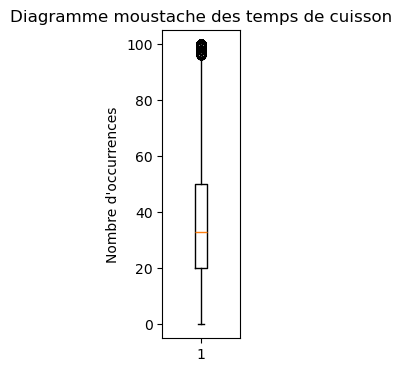

In [61]:
#On refait un moustache pour voir ce que ça donne 

# Extraire les occurrences et les mots
occurrences_values = list(dictionnaire_minutes.values())
mots = list(dictionnaire_minutes.keys())

# Créer le diagramme en boîte (boxplot)
fig, ax = plt.subplots()
fig.set_size_inches(1, 4)
ax.boxplot(occurrences_values)

# Calculer la position des points extrêmes
outliers = ax.lines[5].get_ydata()

# Afficher les mots associés aux outliers (valeurs extrêmes)
for outlier in outliers:
    # Trouver le mot correspondant à la valeur d'occurrence
    mot_associe = [mot for mot, count in dictionnaire_minutes.items() if count == outlier]

# Ajouter un titre et des labels
plt.title('Diagramme moustache des temps de cuisson')
plt.ylabel('Nombre d\'occurrences')

# Afficher le diagramme
plt.show()

On fera une seule catégorie pour les valeurs au dessus de  200 